In [75]:
import networkx as nx
import matplotlib.pyplot as plt
from numpy import random
import pandas as pd
import numpy as np
import sys
import seaborn as sns
# import sys
# reload(sys)
# sys.setdefaultencoding('utf-8')

sns.set_palette('Dark2')
plt.rcParams['figure.figsize'] = (8,6)
%matplotlib inline


In [189]:
wine_FlavourProfiles = pd.read_csv('../WineData/wine_FlavourPofiles.csv', index_col= 0)

wines = pd.read_csv('../WineData/WineData_withFlavours.csv',index_col=0)
wines

,Ageing,Alcohol,BlendPercent,CommonName,FSO2,Latitude,Longitude,MainVariety,Origin,RS,...,Vintage_dateTime,WineBody,WineMaker,WineName,WineStyle,WineTaste,WineType,Wooded,pH,clean_TastingNotes
0,1-3 years,13.50,Pinot Gris,NaN,NaN,NaN,NaN,Pinot Gris,Robertson,1.80,...,2002-01-01 00:00:00,NaN,NaN,Van Loveren Pinot Gris 2002,NaN,NaN,White,NaN,NaN,[]
1,1-5 years,13.50,Chardonnay,NaN,NaN,NaN,NaN,Chardonnay,Robertson,1.70,...,2002-01-01 00:00:00,NaN,NaN,Van Loveren Limited Release Chardonnay 2002,NaN,NaN,White,NaN,NaN,"[nutty, oak, buttery]"
2,NaN,NaN,Blend,NaN,NaN,NaN,NaN,NaN,Walker Bay,NaN,...,NaN,NaN,NaN,Whalehaven Baleine Noir NV,NaN,NaN,NaN,NaN,NaN,"[wooded, herby, mintiness, cherries, cassis, f..."
3,This wine will improve in complexity over the ...,15.00,100% Shiraz,NaN,NaN,NaN,NaN,Shiraz,Coastal,2.50,...,2001-01-01 00:00:00,NaN,Andries Blake,Indalo Shiraz 2001,NaN,NaN,Red,NaN,NaN,"[spicy, saddle, bag, complimented, oak, berry,..."
4,NaN,13.25,Pinotage,NaN,NaN,NaN,NaN,Pinotage,Coastal,1.70,...,NaN,NaN,Andries Blake,Indalo Pinotage,NaN,NaN,Red,NaN,NaN,"[banana, red, oak, berry, wooden]"
5,NaN,13.00,100% Sauvignon Blanc,NaN,NaN,NaN,NaN,Sauvignon Blanc,Coastal,3.10,...,2004-01-01 00:00:00,NaN,Andries Blake,Indalo Sauvignon Blanc 2004,NaN,NaN,White,NaN,NaN,"[tropical, grassy, fig, asparagus, initial, pa..."
6,NaN,14.00,100% Chenin Blanc,NaN,NaN,NaN,NaN,Chenin Blanc,Coastal,4.30,...,NaN,NaN,Andries Blake,Indalo Chenin Blanc,NaN,NaN,White,NaN,NaN,"[spicy, overripe, guava, tropical, guava, pine..."
7,NaN,12.45,"Pinotage, Shiraz, Tinta Barocca",NaN,NaN,NaN,NaN,Pinotage,Swartland,1.00,...,NaN,NaN,Andries Blake,dVine Dry Red (500ml),NaN,NaN,Red,NaN,NaN,"[fruity, red, spicy, earthy, overripe, plummy,..."
8,NaN,12.50,"Steen, Colombard",NaN,NaN,NaN,NaN,Chenin Blanc,Swartland,2.00,...,NaN,NaN,Andries Blake,dVine Dry White (500ml),NaN,NaN,White,NaN,NaN,"[passion, tropical, fruit, floral, flinty, aci..."
9,NaN,12.00,"Bukettraube, Steen",NaN,NaN,NaN,NaN,Bukettraube,Swartland,22.00,...,NaN,NaN,Andries Blake,dVine Semi Sweet (500ml),NaN,NaN,White,NaN,NaN,"[flowers, honeycomb, creamy, honey, acid, supp..."


In [114]:
wines.describe(include = 'all')

,Ageing,Alcohol,BlendPercent,CommonName,FSO2,Latitude,Longitude,MainVariety,Origin,RS,...,Vintage_dateTime,WineBody,WineMaker,WineName,WineStyle,WineTaste,WineType,Wooded,pH,clean_TastingNotes
count,1592,4080.000000,4541,3085,402.000000,3046,3046,7634,6809,3892.000000,...,7382,1716,3949,7745,2493,1697,7687,0.0,72.000000,7639
unique,1090,NaN,988,342,NaN,251,253,56,107,NaN,...,28,6,427,7739,7,5,9,NaN,NaN,6277
top,A multi-dimensional wine exhibiting excellent ...,NaN,100% Chardonnay,Fairview Wine & Cheese,NaN,0,0,Cabernet Sauvignon,Coastal,NaN,...,2003-01-01 00:00:00,Full,Francois Naude,Sejana Merlot 2000,Dry,Fruity,Red,NaN,NaN,[]
freq,20,NaN,462,50,NaN,279,279,1180,1862,NaN,...,1289,841,87,2,2115,1243,4010,NaN,NaN,907
mean,NaN,13.713352,NaN,NaN,32.658831,NaN,NaN,NaN,NaN,9.605579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.468889,NaN
std,NaN,1.911945,NaN,NaN,13.456861,NaN,NaN,NaN,NaN,30.169104,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.189993,NaN
min,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.030000,NaN
25%,NaN,13.000000,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,2.020000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.387500,NaN
50%,NaN,13.600000,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,2.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,NaN
75%,NaN,14.120000,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.600000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.600000,NaN


# Looking at the data visually

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1342be410>]], dtype=object)

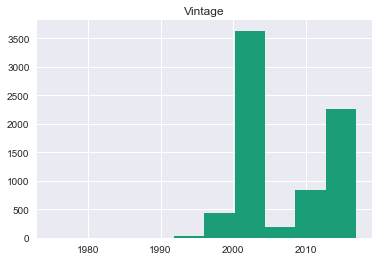

In [115]:
wines.hist(column = 'Vintage')

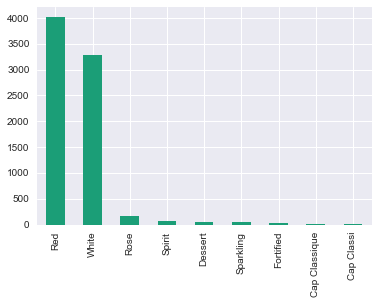

In [160]:
wines.WineType.value_counts().plot(kind='bar')

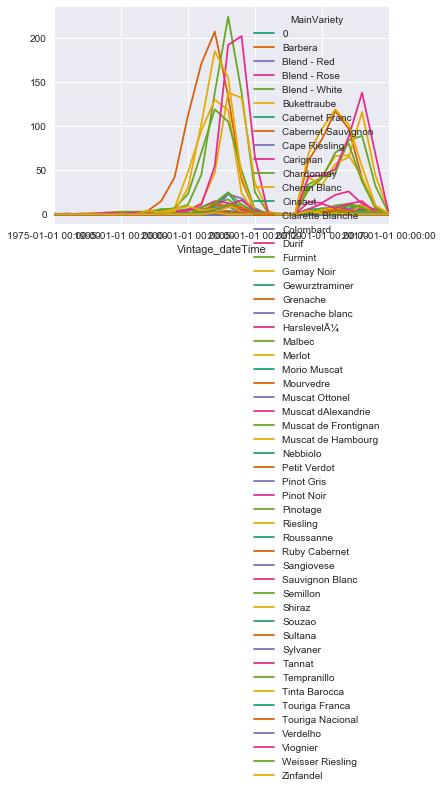

In [116]:
year_variety = wines[['Vintage_dateTime','MainVariety']].dropna()
year_variety = pd.crosstab(year_variety.Vintage_dateTime,year_variety.MainVariety)
year_variety.plot()

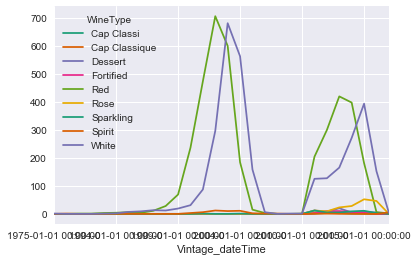

In [117]:
year_variety = wines[['Vintage_dateTime','WineType']].dropna()
year_variety = pd.crosstab(year_variety.Vintage_dateTime,year_variety.WineType)
year_variety.plot()

7745 56


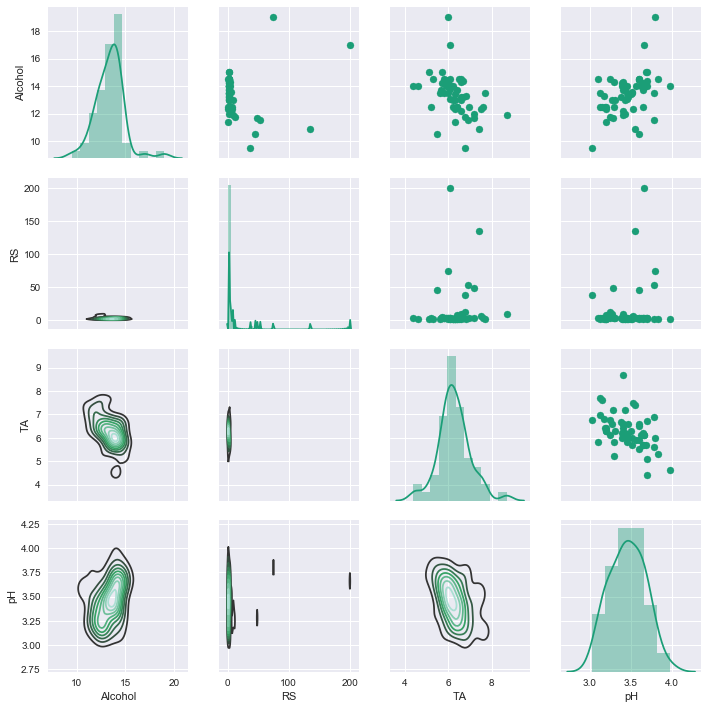

In [118]:
wineNumbers = wines[['Alcohol','RS','TA','pH']]
print len(wineNumbers),len(wineNumbers.dropna())
g = sns.PairGrid(wineNumbers.dropna(), diag_sharey=False)
g.map_lower(sns.kdeplot)
g.map_upper(plt.scatter)
g.map_diag(sns.distplot)

# Machine learning on descriptors?

## Feature extraction on the Clean Tasting Notes

Since the Types of wine are mostly Red and White, I want to see if the Tasting notes can be clustered into red and white wines

In [169]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(wines.clean_TastingNotes.dropna())
# Print result of toarray() method

csr_mat_array = csr_mat.toarray()
print np.max(csr_mat_array)
print(csr_mat_array.shape)
# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


1.0
(7639, 6104)
[u'aarde', u'abalone', u'abandon', u'aberdeen', u'abilities', u'ability', u'able', u'abounding', u'abounds', u'absa', u'ac', u'acacia', u'accasia', u'accented', u'accenting', u'accents', u'accentuated', u'acceptable', u'accesible', u'access', u'accessib', u'accessibility', u'accolades', u'accommodating', u'accomp', u'accompanies', u'accompaniments', u'accompany', u'accompanying', u'according', u'accounted', u'achieve', u'achieved', u'achiever', u'achieves', u'achieving', u'aci', u'acid', u'acidi', u'acidic', u'acidit', u'acidity', u'aciditygives', u'acidityleading', u'acids', u'acidty', u'acidy', u'acquire', u'across', u'actions', u'actually', u'ad', u'adaptability', u'adapts', u'added', u'adding', u'addition', u'additions', u'additives', u'adds', u'adequate', u'adjoins', u'admiration', u'adn', u'adoro', u'advantage', u'adventure', u'advertised', u'advice', u'advised', u'advocate', u'aeminently', u'aeratio', u'aeration', u'af', u'afer', u'affair', u'affinity', u'afford

In [170]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components = 50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters = 2)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)

In [171]:
# Fit the pipeline to articles
pipeline.fit(csr_mat)

# Calculate the cluster labels: labels
labels = pipeline.predict(csr_mat)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': wines.WineType[wines.clean_TastingNotes.notnull()]})

# Display df sorted by cluster label
print(df.sort_values('label'))

     article  label
0      White      0
5272     Red      0
5271     Red      0
5270     Red      0
5266     Red      0
5263     Red      0
5261   White      0
5260   White      0
5259   White      0
5258   White      0
5257   White      0
5256   White      0
5253   White      0
5251   White      0
5248   White      0
5246   White      0
5243   White      0
5242     Red      0
5241     Red      0
5240     Red      0
5273   White      0
5238     Red      0
5274   White      0
5278   White      0
5313     Red      0
5311     Red      0
5310     Red      0
5309   White      0
5308     Red      0
5307   White      0
...      ...    ...
6676     Red      1
1552     Red      1
6679     Red      1
6680     Red      1
6681     Red      1
6657     Red      1
4600     Red      1
4613     Red      1
6652     Red      1
2949     Red      1
6632     Red      1
6634     Red      1
6635     Red      1
6636     Red      1
6637     Red      1
6638     Red      1
6639     Red      1
6640     Red      1


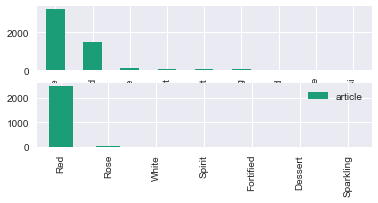

In [173]:
numLabels = 2
for i in range(numLabels):
    plt.subplot(numLabels+1,1,i+1)
    df.article[df.label == i].value_counts().plot(kind = 'bar')
plt.legend()

# Networking

In [203]:
import networkx as nx
G=nx.Graph()

In [231]:
wine_FlavourProfiles.head()

,WineName,WineType,Vintage_dateTime,clean_TastingNotes,Flower,Citrus,Tree Fruit,Tropical Fruit,Red Fruit,Black Fruit,...,Earth,Microbial,Oak Aging,General Aging,Cork Taint(TCA),Sulfides & Mercaptans,Brettanomyces,Madeirized (orCooked),Volatile Acidity (AceticAcid),numProfiles
1,Van Loveren Limited Release Chardonnay 2002,White,2002-01-01 00:00:00,"[nutty, oak, buttery]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Indalo Shiraz 2001,Red,2001-01-01 00:00:00,"[spicy, saddle, bag, complimented, oak, berry,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Indalo Sauvignon Blanc 2004,White,2004-01-01 00:00:00,"[tropical, grassy, fig, asparagus, initial, pa...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
14,L Avenir L Ami Simon 1998,Red,1998-01-01 00:00:00,"[fruit, spice, pepper, taste, fruity, tannins,...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Van Loveren Limited Release Shiraz 2001,Red,2001-01-01 00:00:00,"[fruit, vanilla, oak, tannins, individually, n...",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Only wines that share profiles are useful, so I need to remove all wines that did not have identified profiles

In [232]:
wine_FlavourProfiles['numProfiles'] = wine_FlavourProfiles.sum(axis = 1)
wines_for_network = wine_FlavourProfiles[wine_FlavourProfiles.numProfiles>0]

The networkx package can use a pandas df, but it needs to be in a certain format. It seems easier to build the network manually

In [233]:
for i in range(len(wines_for_network)):
    G.add_node(wines_for_network.WineName.iloc[i],
               typeOfWine = wines_for_network.WineType.iloc[i],
               vintage = wines_for_network.Vintage_dateTime.iloc[i],
              numProfiles = wines_for_network.numProfiles.iloc[i])

In [239]:
for i in range(len(wines_for_network)):
    for p in wines_for_network.columns[4:-1]:
        if wines_for_network[p].iloc[i]>0:
            #Now we know that the profile is present for the first wine, so we check to see if it matches other wines
            for j in range(len(wines_for_network))[i+1:]:
                if wines_for_network[p].iloc[i]>0:
                    if G.has_edge(i,j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i,j,weight = 1)

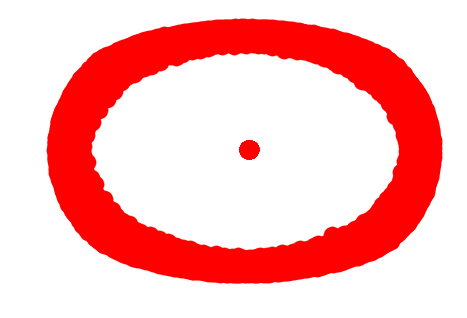

In [244]:
nx.draw(G,pos=nx.spring_layout(G))

In [242]:
A = nx.adjacency_matrix(G)
